### Librerías

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import re

### Funciones

In [2]:
############################################################################################################
#######################################        Funciones        ############################################
############################################################################################################

def exp_col(df, c):
    """Función que recibe un dataframe, así como un string con el nombre la columna a analizar,
    sólo imprime en pantalla datos sobre frecuencias, no retorna ningún objeto"""
    #Asignar a un dataframe auxiliar
    df_aux = df[c]

    #Obtener la frecuencia en % para cada valor df_aux1
    df_aux1 = (round(df_aux.value_counts(normalize=True)*100,2)).to_frame()

    # Resetear indice
    df_aux1.reset_index(inplace=True)

    # Renombrar columnas
    df_aux1.rename(columns={c: 'Porcentaje', 'index':c}, inplace=True)

    # Mostrar en pantlla
    print('Primeros 20 valores')
    display(df_aux1.head(20))

    # Graficar
    plot = (df_aux.value_counts(normalize=True)*100).head(20).plot(kind='bar')
    plt.show()

    print('Últimos 20 valores')
    display(df_aux1.tail(20))



### Lectura de archivo

In [3]:
path = 'C:/Users/Itzel/Documents/attacks.csv'
attacks = pd.read_csv(path, encoding = 'latin-1')

attacks.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


### Exploración global del archivo

In [4]:
total_records = attacks.shape[0]
print('Total de registros:', total_records)
print('Total de columnas:', attacks.shape[1])

Total de registros: 25723
Total de columnas: 24


In [5]:
print('---------------------------- Valores nulos & tipo de dato por columna -----------------------------')
attacks.info()
print('')

print(attacks.columns)

---------------------------- Valores nulos & tipo de dato por columna -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   obje

In [6]:
# Renombrar columnas
attacks.rename(columns={'Sex ': 'Sex', 'Species ': 'Species' }, inplace=True)

### Exploración a nivel columna

Total de registros: 25723
---------------------------- Case Number ----------------------------
Porcentaje de nulos: 66.0
Número de categorías únicas: 6288
Primeros 20 valores


,Case Number,Porcentaje
0,0,27.58
1,1907.10.16.R,0.02
2,2013.10.05,0.02
3,1915.07.06.a.R,0.02
4,1966.12.26,0.02
5,1990.05.10,0.02
6,1923.00.00.a,0.02
7,1980.07.00,0.02
8,2006.09.02,0.02
9,1913.08.27.R,0.02


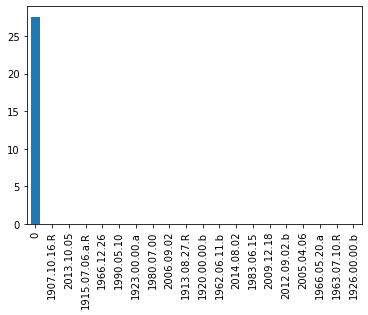

Últimos 20 valores


,Case Number,Porcentaje
6267,2017.03.18,0.01
6268,1972.09.04,0.01
6269,1992.09.18,0.01
6270,2013.08.29,0.01
6271,2003.03.10,0.01
6272,1912.01.01,0.01
6273,1893.05.17,0.01
6274,1965.07.26,0.01
6275,1961.09.24.b,0.01
6276,1996.05.18,0.01


---------------------------- Date ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 5434
Primeros 20 valores


,Date,Porcentaje
0,1957,0.17
1,1942,0.14
2,1956,0.13
3,1950,0.11
4,1958,0.11
5,1941,0.11
6,No date,0.10
7,1949,0.10
8,1955,0.08
9,"No date, Before 1963",0.08


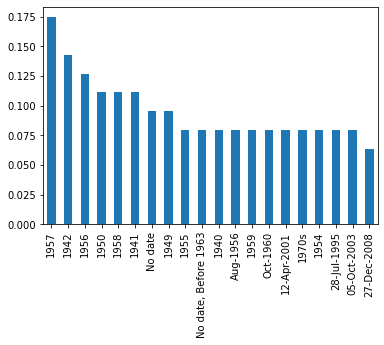

Últimos 20 valores


,Date,Porcentaje
5413,30-Aug-2000,0.02
5414,02-Jun-1886,0.02
5415,09-Oct-1934,0.02
5416,05-Nov-1997,0.02
5417,21-Aug-1971,0.02
5418,15-Feb-2015,0.02
5419,Aug-1995,0.02
5420,21-Feb-2000,0.02
5421,12-Apr-1955,0.02
5422,19-Feb-1987,0.02


---------------------------- Year ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 250
Primeros 20 valores


,Year,Porcentaje
0,2015.0,2.27
1,2017.0,2.16
2,2016.0,2.06
3,2011.0,2.03
4,2014.0,2.02
5,0.0,1.98
6,2008.0,1.94
7,2013.0,1.94
8,2009.0,1.90
9,2012.0,1.86


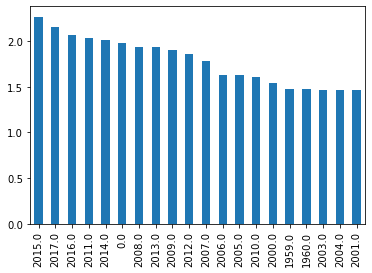

Últimos 20 valores


,Year,Porcentaje
229,1807.0,0.02
230,1723.0,0.02
231,1804.0,0.02
232,1780.0,0.02
233,1801.0,0.02
234,1767.0,0.02
235,1815.0,0.02
236,1822.0,0.02
237,1818.0,0.02
238,1783.0,0.02


---------------------------- Type ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 9
Primeros 20 valores


,Type,Porcentaje
0,Unprovoked,72.96
1,Provoked,9.11
2,Invalid,8.69
3,Sea Disaster,3.79
4,Boating,3.22
5,Boat,2.18
6,Questionable,0.03
7,Boatomg,0.02


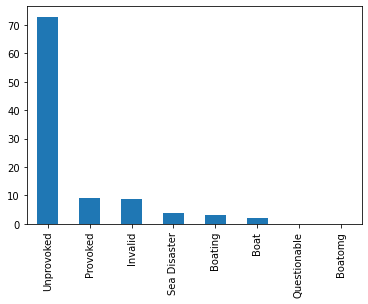

Últimos 20 valores


,Type,Porcentaje
0,Unprovoked,72.96
1,Provoked,9.11
2,Invalid,8.69
3,Sea Disaster,3.79
4,Boating,3.22
5,Boat,2.18
6,Questionable,0.03
7,Boatomg,0.02


---------------------------- Country ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 213
Primeros 20 valores


,Country,Porcentaje
0,USA,35.65
1,AUSTRALIA,21.40
2,SOUTH AFRICA,9.26
3,PAPUA NEW GUINEA,2.14
4,NEW ZEALAND,2.05
5,BRAZIL,1.79
6,BAHAMAS,1.74
7,MEXICO,1.42
8,ITALY,1.14
9,FIJI,0.99


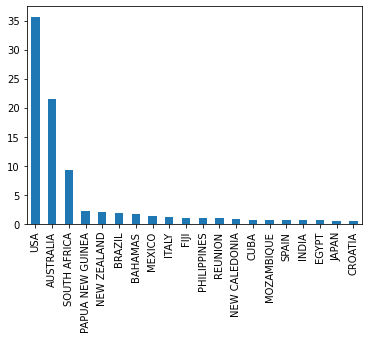

Últimos 20 valores


,Country,Porcentaje
192,REUNION ISLAND,0.02
193,NORTH ATLANTIC OCEAN,0.02
194,GULF OF ADEN,0.02
195,GRAND CAYMAN,0.02
196,WESTERN SAMOA,0.02
197,COOK ISLANDS,0.02
198,CURACAO,0.02
199,TASMAN SEA,0.02
200,GHANA,0.02
201,KUWAIT,0.02


---------------------------- Area ----------------------------
Porcentaje de nulos: 77.0
Número de categorías únicas: 826
Primeros 20 valores


,Area,Porcentaje
0,Florida,17.74
1,New South Wales,8.31
2,Queensland,5.32
3,Hawaii,5.10
4,California,4.96
5,KwaZulu-Natal,3.64
6,Western Cape Province,3.34
7,Western Australia,3.23
8,South Carolina,2.74
9,Eastern Cape Province,2.74


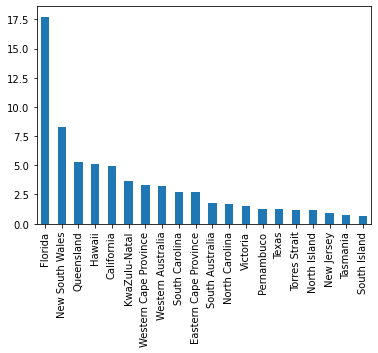

Últimos 20 valores


,Area,Porcentaje
805,300 miles east of Luzon,0.02
806,Bay of Maputu,0.02
807,740 miles SE of Tarawa Atoll,0.02
808,Bonin Islands,0.02
809,Kagawa Prefecture,0.02
810,Toamasina Province,0.02
811,Fernando Po Island,0.02
812,San Blas coast,0.02
813,Tafea Province,0.02
814,Kwajalein,0.02


---------------------------- Location ----------------------------
Porcentaje de nulos: 78.0
Número de categorías únicas: 4109
Primeros 20 valores


,Location,Porcentaje
0,"New Smyrna Beach, Volusia County",2.83
1,"Daytona Beach, Volusia County",0.52
2,"Ponce Inlet, Volusia County",0.35
3,"Melbourne Beach, Brevard County",0.31
4,"Myrtle Beach, Horry County",0.30
5,Durban,0.28
6,"Isle of Palms, Charleston County",0.24
7,"Boa Viagem, Recife",0.24
8,"Cocoa Beach, Brevard County",0.21
9,"Ponce Inlet, New Smyrna Beach, Volusia County",0.21


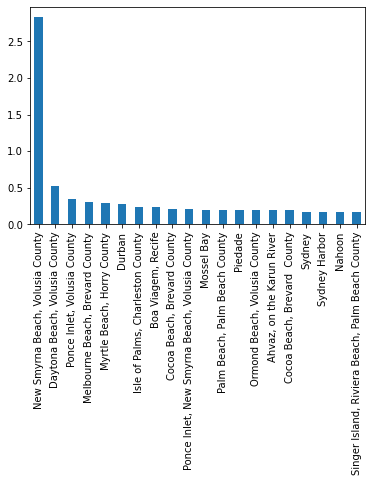

Últimos 20 valores


,Location,Porcentaje
4088,"Selection Reef, Umdhloti",0.02
4089,Binalong Bay,0.02
4090,The Fountain Pub in Tenbury Wells,0.02
4091,Terrigal Beach,0.02
4092,Bahia,0.02
4093,"Ocracoke Island, Hyde County",0.02
4094,"Basalt Island, 9km from Silverstrand",0.02
4095,"Long Key, Monroe County",0.02
4096,Near Lautoka,0.02
4097,"Samo Plantation, east coast",0.02


---------------------------- Activity ----------------------------
Porcentaje de nulos: 78.0
Número de categorías únicas: 1533
Primeros 20 valores


,Activity,Porcentaje
0,Surfing,16.86
1,Swimming,15.09
2,Fishing,7.49
3,Spearfishing,5.78
4,Bathing,2.81
5,Wading,2.59
6,Diving,2.21
7,Standing,1.72
8,Snorkeling,1.55
9,Scuba diving,1.32


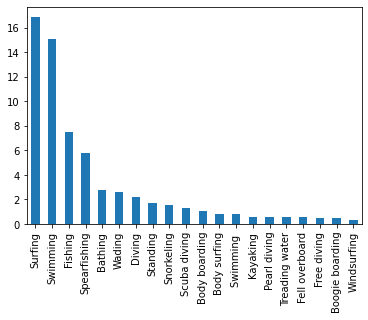

Últimos 20 valores


,Activity,Porcentaje
1512,Gaffing & attempting to bring onboard a harpoo...,0.02
1513,USS Johnston DD 557 sunk on 10/24/1944 in the ...,0.02
1514,Spearfishing (but treading water on the surface),0.02
1515,Shell Diving,0.02
1516,Bathing alongside the American ship Thomas W. ...,0.02
1517,Fishing from a kayak,0.02
1518,Fell from cliff while fishing & disappeared in...,0.02
1519,Board sailing,0.02
1520,"Free diving, collecting sand dollars",0.02
1521,Paddle-boarding,0.02


---------------------------- Name ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 5231
Primeros 20 valores


,Name,Porcentaje
0,male,9.03
1,female,1.59
2,boy,0.38
3,2 males,0.26
4,boat,0.23
5,child,0.20
6,sailor,0.16
7,Anonymous,0.16
8,males,0.16
9,a sailor,0.13


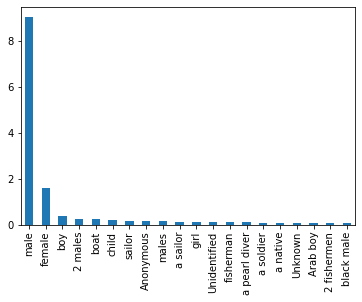

Últimos 20 valores


,Name,Porcentaje
5210,Emil A. Berndt,0.02
5211,Dale Webster,0.02
5212,Earl DeVore,0.02
5213,"sailor, a boatswain's mate from the Piscataqua",0.02
5214,Bruce Lang,0.02
5215,Rick Le Prevost,0.02
5216,Philip Stanton,0.02
5217,OneDLL,0.02
5218,boat crew,0.02
5219,Micah Flanaburg,0.02


---------------------------- Sex ----------------------------
Porcentaje de nulos: 78.0
Número de categorías únicas: 7
Primeros 20 valores


,Sex,Porcentaje
0,M,88.79
1,F,11.10
2,M,0.03
3,N,0.03
4,.,0.02
5,lli,0.02


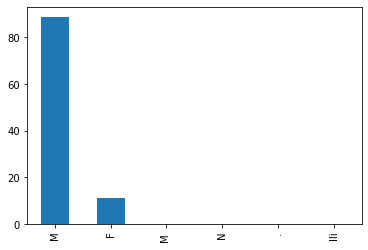

Últimos 20 valores


,Sex,Porcentaje
0,M,88.79
1,F,11.10
2,M,0.03
3,N,0.03
4,.,0.02
5,lli,0.02


---------------------------- Age ----------------------------
Porcentaje de nulos: 87.0
Número de categorías únicas: 158
Primeros 20 valores


,Age,Porcentaje
0,17,4.44
1,18,4.32
2,19,4.09
3,20,4.06
4,15,4.00
5,16,3.98
6,21,3.43
7,22,3.37
8,25,3.11
9,24,3.05


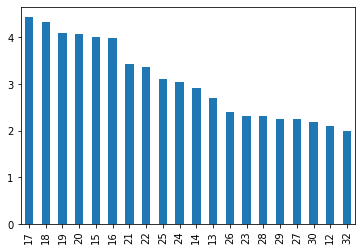

Últimos 20 valores


,Age,Porcentaje
137,9 months,0.03
138,81,0.03
139,34 & 19,0.03
140,84,0.03
141,18 or 20,0.03
142,23 & 26,0.03
143,74,0.03
144,9 & 12,0.03
145,,0.03
146,"""young""",0.03


---------------------------- Injury ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 3738
Primeros 20 valores


,Injury,Porcentaje
0,FATAL,12.78
1,Survived,1.55
2,Foot bitten,1.39
3,No injury,1.31
4,Leg bitten,1.15
5,Left foot bitten,0.80
6,No details,0.69
7,Right foot bitten,0.62
8,"No injury, board bitten",0.49
9,Hand bitten,0.46


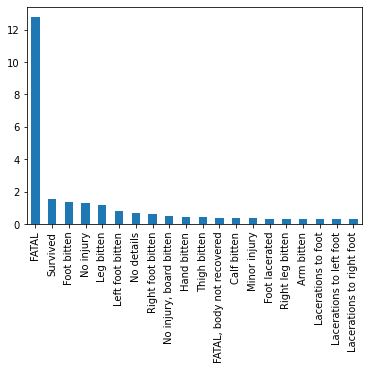

Últimos 20 valores


,Injury,Porcentaje
3717,Minor lacerations on left hand,0.02
3718,5 punctures to hand from captive shark PROVOKE...,0.02
3719,"No injury, punctures to swim fin",0.02
3720,"2.5"" laceration on right hand",0.02
3721,Right shoulder forarm & wrist bitten,0.02
3722,"Thigh severely lacerated, shin & calf lacerated",0.02
3723,"No Injury, surfboard bitten",0.02
3724,Foot & calf lacerated,0.02
3725,"No injury, sleeve ripped",0.02
3726,"3"" wound on thigh",0.02


---------------------------- Fatal (Y/N) ----------------------------
Porcentaje de nulos: 78.0
Número de categorías únicas: 9
Primeros 20 valores


,Fatal (Y/N),Porcentaje
0,N,74.49
1,Y,24.08
2,UNKNOWN,1.23
3,N,0.12
4,N,0.02
5,y,0.02
6,M,0.02
7,2017,0.02


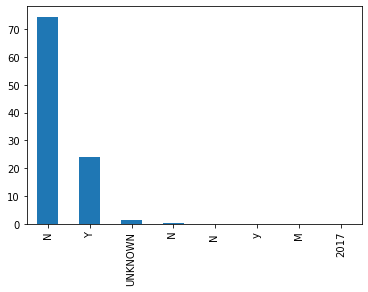

Últimos 20 valores


,Fatal (Y/N),Porcentaje
0,N,74.49
1,Y,24.08
2,UNKNOWN,1.23
3,N,0.12
4,N,0.02
5,y,0.02
6,M,0.02
7,2017,0.02


---------------------------- Time ----------------------------
Porcentaje de nulos: 89.0
Número de categorías únicas: 367
Primeros 20 valores


,Time,Porcentaje
0,Afternoon,6.34
1,11h00,4.34
2,Morning,4.10
3,12h00,3.70
4,15h00,3.66
5,16h00,3.43
6,14h00,3.29
7,16h30,2.51
8,17h00,2.48
9,14h30,2.48


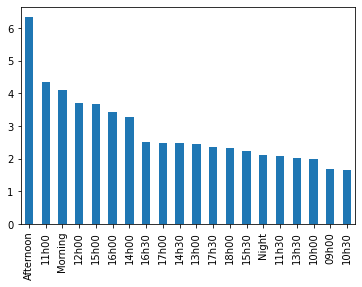

Últimos 20 valores


,Time,Porcentaje
346,11h51,0.03
347,06h00 -- 07h00,0.03
348,18h15 to 21h30,0.03
349,17h51,0.03
350,00h30,0.03
351,15h19,0.03
352,Shortly before 12h00,0.03
353,"""After lunch""",0.03
354,"19h00, Dusk",0.03
355,07h08,0.03


---------------------------- Species ----------------------------
Porcentaje de nulos: 87.0
Número de categorías únicas: 1550
Primeros 20 valores


,Species,Porcentaje
0,White shark,4.71
1,Shark involvement prior to death was not confi...,3.03
2,Invalid,2.94
3,Shark involvement not confirmed,2.54
4,Tiger shark,2.11
5,Shark involvement prior to death unconfirmed,1.96
6,Bull shark,1.50
7,4' shark,1.15
8,6' shark,1.15
9,Questionable incident,1.01


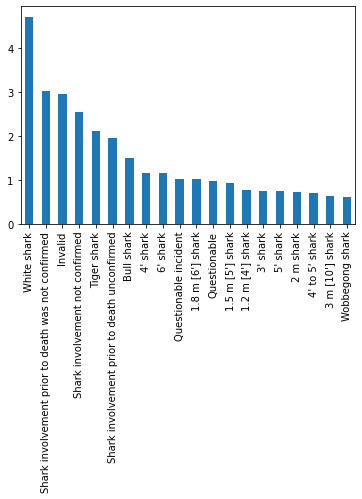

Últimos 20 valores


,Species,Porcentaje
1529,1.8 m [6'] Caribbean reef shark,0.03
1530,"White shark, 7'",0.03
1531,"Tiger shark, less than 10'",0.03
1532,a small hammerhead shark,0.03
1533,>3.4 m [11'] white shark,0.03
1534,"White shark, 5m",0.03
1535,"Whaler shark, 2.7 m [9'], 350- to 450-lb iden...",0.03
1536,"4.3 m [14'], 1000-lb shark",0.03
1537,Tooth fragments recovered from hull,0.03
1538,"Oceanic whitetip shark,1.8 m [6']",0.03


---------------------------- Investigator or Source ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 4970
Primeros 20 valores


,Investigator or Source,Porcentaje
0,"C. Moore, GSAF",1.67
1,"C. Creswell, GSAF",1.46
2,"S. Petersohn, GSAF",1.30
3,R. Collier,0.88
4,"R. Collier, GSAF",0.76
5,"T. Peake, GSAF",0.76
6,"M. Levine, GSAF",0.72
7,"A. Gifford, GSAF",0.45
8,C. Moore. GSAF,0.43
9,"B. Myatt, GSAF",0.41


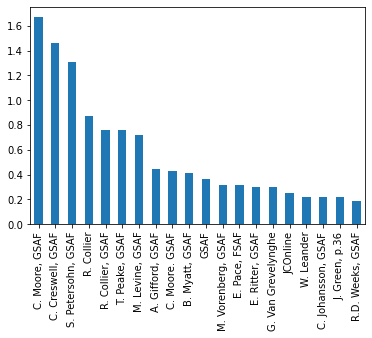

Últimos 20 valores


,Investigator or Source,Porcentaje
4949,"The Witness, 5/10/2011",0.02
4950,"H.D. Baldridge, p.166; SAF Case #1284",0.02
4951,"New York Times, 7/28/1904",0.02
4952,"Port Arthur News, 4/12/1935",0.02
4953,"The Cairns Post, 9/28/2015",0.02
4954,H.D. Baldridge (1994) SAF Case #1587; Unable ...,0.02
4955,"C. Black, p.12; V.M. Coppleson (1958) pp. 104-105",0.02
4956,"AJC, 4/5/2017",0.02
4957,"Barrier Miner, 9/6/1926",0.02
4958,"NY Times, 11/21/1895",0.02


---------------------------- pdf ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 6292
Primeros 20 valores


,pdf,Porcentaje
0,1921.11.27.a-b-Jack.pdf,0.03
1,1898.00.00.R-Syria.pdf,0.03
2,1935.06.05.R-SolomonIslands.pdf,0.03
3,1923.00.00.a-NJ fisherman.pdf,0.03
4,1916.07.12.a-b-Stillwell-Fisher.pdf,0.03
5,1934.12.23.a-b-Inman.pdf,0.03
6,1916.12.08.a-b-German.pdf,0.03
7,1931.09.21.a-b-Holaday-Barrows.pdf,0.03
8,1907.10.16.R-HongKong.pdf,0.03
9,1906.09.27.R.a&b-Munich-Swede.pdf,0.03


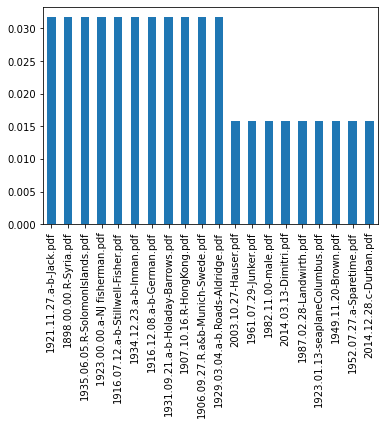

Últimos 20 valores


,pdf,Porcentaje
6271,1986.12.31-deWet.pdf,0.02
6272,1973.09.09-Schneppershoff.pdf,0.02
6273,2014.10.02.a-Pollard.pdf,0.02
6274,1959.07.25.a-Agnew.pdf,0.02
6275,1936.03.04-CapeHotham.pdf,0.02
6276,ND-0069-Dalton.pdf,0.02
6277,2012.04.00-Hapworth.pdf,0.02
6278,2002.05.10-PauloFernandesAlvesFerreira.pdf,0.02
6279,1864.08.00-Madagascar.pdf,0.02
6280,1961.03.14-O'Neill.pdf,0.02


---------------------------- href formula ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 6291
Primeros 20 valores


,href formula,Porcentaje
0,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
1,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
2,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
3,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
4,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
5,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
6,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
7,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
8,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
9,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03


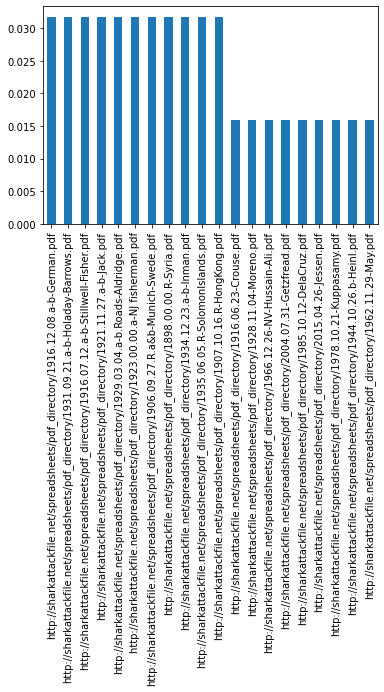

Últimos 20 valores


,href formula,Porcentaje
6270,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6271,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6272,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6273,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6274,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6275,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6276,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6277,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6278,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6279,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02


---------------------------- href ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 6286
Primeros 20 valores


,href,Porcentaje
0,http://sharkattackfile.net/spreadsheets/pdf_di...,0.06
1,http://sharkattackfile.net/spreadsheets/pdf_di...,0.05
2,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
3,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
4,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
5,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
6,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
7,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
8,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03
9,http://sharkattackfile.net/spreadsheets/pdf_di...,0.03


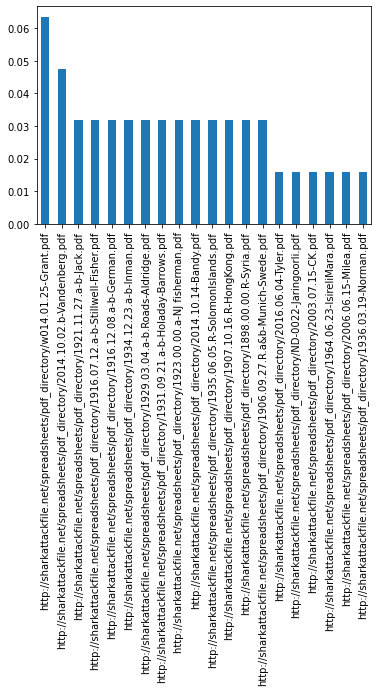

Últimos 20 valores


,href,Porcentaje
6265,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6266,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6267,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6268,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6269,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6270,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6271,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6272,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6273,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02
6274,http://sharkattackfile.net/spreadsheets/pdf_di...,0.02


---------------------------- Case Number.1 ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 6286
Primeros 20 valores


,Case Number.1,Porcentaje
0,1980.07.00,0.03
1,1913.08.27.R,0.03
2,1990.05.10,0.03
3,1962.06.11.b,0.03
4,1923.00.00.a,0.03
5,1952.08.04,0.03
6,1907.10.16.R,0.03
7,2006.09.02,0.03
8,1966.12.26,0.03
9,1915.07.06.a.R,0.03


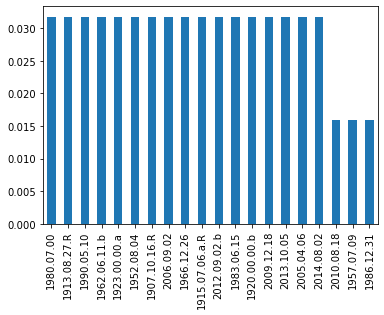

Últimos 20 valores


,Case Number.1,Porcentaje
6265,2003.03.10,0.02
6266,1912.01.01,0.02
6267,1893.05.17,0.02
6268,1965.07.26,0.02
6269,1901.01.30,0.02
6270,1961.09.24.b,0.02
6271,1896.00.00.a,0.02
6272,2016.06.21.b,0.02
6273,1990.08.30,0.02
6274,1991.04.24,0.02


---------------------------- Case Number.2 ----------------------------
Porcentaje de nulos: 76.0
Número de categorías únicas: 6287
Primeros 20 valores


,Case Number.2,Porcentaje
0,1983.06.15,0.03
1,2013.10.05,0.03
2,2009.12.18,0.03
3,1920.00.00.b,0.03
4,1962.06.11.b,0.03
5,1966.12.26,0.03
6,1915.07.06.a.R,0.03
7,1990.05.10,0.03
8,1923.00.00.a,0.03
9,1980.07.00,0.03


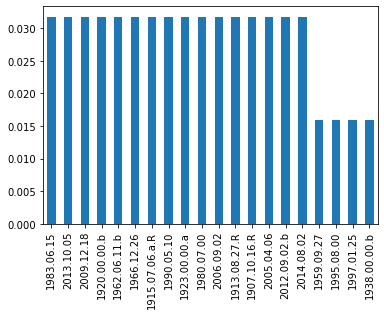

Últimos 20 valores


,Case Number.2,Porcentaje
6266,1992.09.18,0.02
6267,2013.08.29,0.02
6268,2003.03.10,0.02
6269,1912.01.01,0.02
6270,1893.05.17,0.02
6271,1965.07.26,0.02
6272,1901.01.30,0.02
6273,1961.09.24.b,0.02
6274,2016.06.21.b,0.02
6275,1848.08.31,0.02


---------------------------- original order ----------------------------
Porcentaje de nulos: 75.0
Número de categorías únicas: 6309
Primeros 20 valores


,original order,Porcentaje
0,569.0,0.03
1,5639.0,0.02
2,4754.0,0.02
3,2899.0,0.02
4,5259.0,0.02
5,6020.0,0.02
6,3861.0,0.02
7,3254.0,0.02
8,1869.0,0.02
9,1031.0,0.02


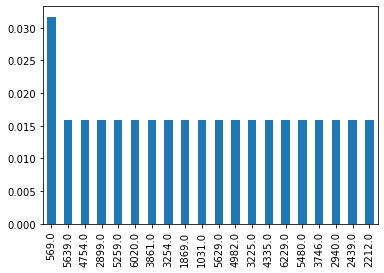

Últimos 20 valores


,original order,Porcentaje
6288,1341.0,0.02
6289,4965.0,0.02
6290,4574.0,0.02
6291,2581.0,0.02
6292,5975.0,0.02
6293,6058.0,0.02
6294,4816.0,0.02
6295,3908.0,0.02
6296,2318.0,0.02
6297,3163.0,0.02


---------------------------- Unnamed: 22 ----------------------------
Porcentaje de nulos: 100.0
Número de categorías únicas: 2
Primeros 20 valores


,Unnamed: 22,Porcentaje
0,stopped here,100.0


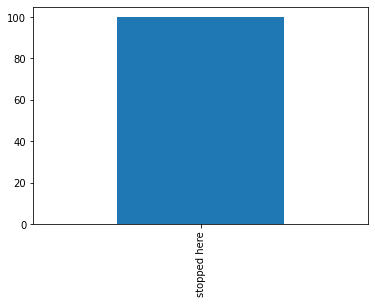

Últimos 20 valores


,Unnamed: 22,Porcentaje
0,stopped here,100.0


---------------------------- Unnamed: 23 ----------------------------
Porcentaje de nulos: 100.0
Número de categorías únicas: 3
Primeros 20 valores


,Unnamed: 23,Porcentaje
0,Teramo,50.0
1,change filename,50.0


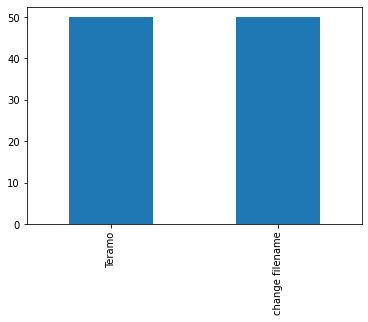

Últimos 20 valores


,Unnamed: 23,Porcentaje
0,Teramo,50.0
1,change filename,50.0


In [7]:
# Variables str
total_records = attacks.shape[0]
print('Total de registros:', total_records)

for c in attacks.columns:
    print('----------------------------', c , '----------------------------')
    print('Porcentaje de nulos:', round(attacks[c].isna().sum()/total_records *100,0) )
    print('Número de categorías únicas:', len(attacks[c].unique()))
    #Imprimir datos acerca de sus frecuencias
    exp_col(attacks, c)

### Tratamiento de datos

Las columnas "Unnamed: 22", "Unnamed: 23", tienen un porcentaje aprox del 100% de valores nulos, razón por la cual se eliminarán.

In [8]:
# Eliminar columnas
attacks.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True)
attacks.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0


#### Columna: Case Number

La columna "Case Number" debería contener valores únicos, se observa:

    El 66% tiene valores nulos
    El 27.58% el id del número de caso es 0

Revisando los registros con "Case Number" == Null

In [9]:
display(attacks.loc[attacks['Case Number'].isna()])

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
attacks.loc[attacks['Case Number'].isna()].isna().sum()

Case Number               17021
Date                      17020
Year                      17020
Type                      17020
Country                   17020
Area                      17020
Location                  17020
Activity                  17020
Name                      17020
Sex                       17020
Age                       17021
Injury                    17020
Fatal (Y/N)               17020
Time                      17021
Species                   17021
Investigator or Source    17020
pdf                       17020
href formula              17020
href                      17020
Case Number.1             17020
Case Number.2             17020
original order            17020
dtype: int64

Eliminamos los registros que estén totalmente con valores nulos

In [11]:
attacks.dropna(axis=0, how='all', inplace=True)

In [12]:
attacks['Case Number'].loc[attacks['Case Number'].isna() == True] = attacks['Case Number.1']

C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Revisando los registros con "Case Number" == '0'

In [13]:
# Consultas
display(attacks.loc[attacks['Case Number']=='0'])

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Consultas
attacks.loc[attacks['Case Number']=='0'].isna().sum()

Case Number                  0
Date                      2400
Year                      2400
Type                      2400
Country                   2400
Area                      2400
Location                  2400
Activity                  2400
Name                      2400
Sex                       2400
Age                       2400
Injury                    2400
Fatal (Y/N)               2400
Time                      2400
Species                   2400
Investigator or Source    2400
pdf                       2400
href formula              2400
href                      2400
Case Number.1             2400
Case Number.2             2400
original order            2393
dtype: int64

In [15]:
# consulta donde Case number == 0 y "original order" sea diferente de nulo
attacks.loc[(attacks['Case Number']=='0') & (attacks['original order'].isna() ==False)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0


Con base en las consultas anteriores se observa que los registros con "Case Number" == 0 no contienen información relevante, por está razón se eliminarán.

In [16]:
attacks = attacks.loc[ attacks['Case Number'] != '0']
print('Total de registros:', attacks.shape[0])

Total de registros: 6303


De la consulta:
    
    display(attacks.loc[attacks['Case Number'].isna()])
    
se observa que existe un único registro con el "Case Number" vacío pero las demás columnas parecen contener información relevante. Asimismo se puede llegar a pensar que las columnas "Case Number", "Case Number.1" y "Case Number.2" son iguales. En la siguiente celda verificamos esta hipotesis:

In [17]:
# Verificamos en primer lugar si Case Number.1 y Case Number.2 son iguales
round((attacks['Case Number'] == attacks['Case Number.1']).sum()/attacks.shape[0]*100,2)

99.62

In [18]:
round((attacks['Case Number'] == attacks['Case Number.2']).sum()/attacks.shape[0]*100,2)

99.94

In [19]:
round((attacks['Case Number.1'] == attacks['Case Number.2']).sum()/attacks.shape[0]*100,2)

99.67

Observamos los casos donde no coinciden 

In [20]:
attacks[attacks['Case Number'] != attacks['Case Number.1']]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
34,2018.04.03,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,...,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269.0
117,2017.07.20.a,20-Jul-2017,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,...,N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6186.0
144,2017.05.06,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,...,Y,17h00,NaN,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159.0
217,2016.09.15,16-Sep-2016,2016.0,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,6086.0
314,2016.01.24.b,24-Jan-2016,2016.0,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5989.0
334,2015.12.23,07-Nov-2015,2015.0,Invalid,USA,Florida,"Paradise Beach, Melbourne, Brevard County",Surfing,Ryla Underwood,F,...,NaN,11h00,Shark involvement not confirmed,"Fox25Orlando, 11/7/2015",2015.11.07-Underwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.11.07,2015.12.23,5969.0
339,2015.10.28.a,28-Oct-2015,2015.0,Unprovoked,USA,Hawaii,"Malaka, Oahu",Body boarding,Raymond Senensi,M,...,N,14h50,NaN,"Star Advertiser, 10/28/2015",2015.10.28-Senensi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.10.28,2015.10.28.a,5964.0
390,2015.07-10,10-Jul-2015,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,...,N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5913.0
560,2014.05.04,04-May-2014,2014.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Simonstown,Diving,NaN,NaN,...,N,NaN,Cow shark,"Sunday Times, 5/5/2014",2015.05.04-CowShark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.05.04,2014.05.04,5743.0
3522,1967.07.05,05-Jul-1967,1967.0,Unprovoked,TURKEY,Mugla Province,Kucukada Island,Spearfishing,Gungor Guven,M,...,Y,13h40,NaN,"C. Moore, GSAF",1967.07.05-Guven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967/07.05,1967.07.05,2781.0


In [21]:
attacks[attacks['Case Number'] != attacks['Case Number.2']]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
390,2015.07-10,10-Jul-2015,2015.0,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,...,N,08h45,"White shark, 7'","KTLA, 7/10/2015",2015.07.10-Miskin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.10,2015.07.10,5913.0
4949,1934.01.08.R,Reported 08-Feb-1934,1934.0,Boating,TURKEY,Istanbul,"Haydarpasa jetty, Istanbul",Fishing,2 males,M,...,N,NaN,NaN,"C. Moore, GSAF",1924.02.08.R-Turkey.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.02.08.R,1934.02.08.R,1354.0
5944,1864.05,May-1864,1864.0,Unprovoked,MAURITIUS,300 miles east of Mauritius,NaN,Fell overboard,male from the whaler Albatross,M,...,Y,NaN,NaN,"North Adams Transcript, 3/18/1898",1864.05.00.Mauritius.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1864.05.00,1864.05.00,359.0
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observamos que en el 99% de los casos coinciden las columnas Case Number, Case Number.1, Case Number.2, y que la esctructura de este campo se construye a partir del fecha como:

    YYYY.MM.DD
    
Asimismo, eliminamos el registro cuyo Case number == 'xx', y las columnas Case Number.1 y Case Number.2

In [22]:
attacks.drop(['Case Number.1', 'Case Number.2'], axis = 1, inplace=True)

In [23]:
attacks = attacks[ attacks['Case Number'] != 'xx']

In [24]:
print('Total de registros:', attacks.shape[0])
print('Número de categorías únicas:', len(attacks['Case Number'].unique()))

Total de registros: 6302
Número de categorías únicas: 6286


De la celda anterior se observa que existen duplicados en 'Case Number', por lo que se identificarán para ver qué información contienen.

In [25]:
# Quitamos registros totalmente duplicados
attacks.drop_duplicates(inplace=True)

In [26]:
print('Total de registros:', attacks.shape[0])
print('Número de categorías únicas:', len(attacks['Case Number'].unique()))

Total de registros: 6302
Número de categorías únicas: 6286


In [27]:
# Obtenemos una serie que nos dice con base en el índice si es un valor único o con duplicados
case_number_duplicated = attacks['Case Number'].duplicated(keep=False)

In [28]:
# Consulta de los registros con 'Case Number' duplicado
attacks[case_number_duplicated]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
522,2014.08.02,02-Aug-2014,2014.0,Unprovoked,USA,Florida,"South of Cocoa Beach, Brevard County",Surfing,male,M,50s,Foot bitten,N,NaN,NaN,"Florida Today, 8/8/2014",2014.08.08-CocoaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5781.0
523,2014.08.02,02-Aug-2014,2014.0,Unprovoked,USA,Florida,"Table Beach, Brevard County",Boogie boarding,Christian Sanhueza,M,8,Laceration to ankle,N,13h00,NaN,"Florida Today, 8/2/2014",2014.08.02-Sanhueza.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5780.0
615,2013.10.05,06-Oct-2013,2013.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Jay Scrivner,M,45,Laceration to thigh,N,08h45,"White shark, 8' to 10'","R. Collier, GSAF",2013.10.06-Scrivner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5688.0
616,2013.10.05,10-Oct-2013,2013.0,Unprovoked,USA,Florida,"Destin, Okaloosa County",Wading,Zachary Tyke Standridge,M,12,Lacerations to right forearm,N,15h30,Small bull shark,"Monroe County Advocate, 10/9/2013",2013.10.05-Standridge.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5687.0
746,2012.09.02.b,02-Sep-2012,2012.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Boogie boarding,female,F,8,Puncture wounds to calf and hand,N,18h30,3.5' to 4' shark,"WYTV, 9/3/2012",2012.09.02.b-NSB-girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5557.0
747,2012.09.02.b,02-Sep-2012,2012.0,Provoked,USA,Hawaii,"Spreckelsville, Maui",Spearfishing,M. Malabon,NaN,NaN,Minor laceration to hand PROVOKED INCIDENT,N,12h00,"Tiger shark, 10' to 12'",HawaiiNow.com,2012.09.02.c-Malabon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5556.0
1063,2009.12.18,18-Dec-2009,2009.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. Johns",Paddling on kneeboard,Tshintshekile Nduva,M,22,FATAL,Y,14h30,NaN,"B. Jordan & A. Ferreira, Times Live, 12/21/2009",2009.12.18.a-Nduva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5240.0
1064,2009.12.18,18-Dec-2009,2009.0,Invalid,SOUTH AFRICA,KwaZulu-Natal,"North Beach, Durban",Surfing,Lance Morris,M,NaN,Minor lacerations to left leg. nitially report...,NaN,NaN,No shark involvement,"M. Addison, C. Eckstander, GSAF",2009.12.18.b-Morris-barracuda bite.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5239.0
1436,2006.09.02,02-Sep-2006,2006.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,male,M,12 or 13,Arm bitten,N,17h55,NaN,"S. Petersohn, GSAF",2006.09.02.b-Child-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4867.0
1437,2006.09.02,02-Sep-2006,2006.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Noordhoek,Surfing,Steven Harcourt-Wood,M,37,"No injury, shark rammed surfboard",N,NaN,"White shark, 3.5m","Cape Times, 9/3/2006",2006.09.02.a-Harcourt-Wood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4866.0


De las consultas anteriores podemos observar que aunque posean el mismo "Case Number", la información en otras columnas es distinta y la columna "original order" podría ser el identificar único, esto se verifica en la siguiente celda.

In [29]:
print('Total de registros:', attacks.shape[0])
print('Número de categorías únicas:', len(attacks['original order'].unique()))

Total de registros: 6302
Número de categorías únicas: 6301


In [30]:
# Obtenemos una serie que nos dice con base en el índice si es un valor único o con duplicados
original_order_duplicated = attacks['original order'].duplicated(keep=False)

In [31]:
# Consulta de los registros con 'Case Number' duplicado
attacks[original_order_duplicated]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
5733,1888.01.22,22-Jan-1888,1888.0,Boating,AUSTRALIA,New South Wales,Sydney Harbor,Rowing,Burke,M,NaN,"Shark bit boat, but no injury to occupant who ...",N,NaN,NaN,"Star, 1/23/1888",1888.01.22-Burke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,569.0
5734,1888.02.00,Feb-1888,1888.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Mzimvubu River mouth,Crossing the river mouth,male,M,NaN,FATAL,Y,NaN,NaN,"Cape Mercantile Advertiser, 2/15/1888, M. Levi...",1888.02.00-Mzimvubu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,569.0


El identificador único de cada caso se puede construir como 

    "Case Number" + "/" + "original order"
    
Sin embargo hay que corregir la estructura de Case Number, ya que existe registros cuya longitud es menor o mayor (traen letras al final) a la longitud de:

    len(YYYY.MM.DD)=10
    
No todos los separadores de las unidades de tiempo son '.'


In [32]:
# Reemplazar -,/ por punto
attacks['Case Number'] = attacks['Case Number'].str.replace('-', '.')

# Quitar .a, .R 
patron='\d{4}.\d{2}.\d{2}'
attacks['Case Number'] = attacks['Case Number'].apply(lambda x : re.findall(patron,x)[0] if len(re.findall(patron,x)) != 0 else x)

Existen registros cuyo Case Number inician con '0000' siendo registros muy antiguos cuyos catos relevantes como la especie o la edad están vacíos razón por la cuál se eliminarán de la base

In [33]:
attacks[attacks['Case Number'].str.startswith('0000.')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,126.0
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,125.0
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,124.0
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,123.0


In [34]:
attacks[attacks['Case Number'].str.startswith('0000.')].shape[0]

4

In [35]:
attacks = attacks[ ~attacks['Case Number'].str.startswith('0000.')]

Existen registros cuyo Case Number inicia con 'ND.'
Analizando el Número de registros que incian así:

In [36]:
attacks[attacks['Case Number'].str.startswith('ND.')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
6181,ND.0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,122.0
6182,ND.0153,1990 or 1991,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Conway Plough & Dr. Jonathan Higgs,M,NaN,Conway's leg was bitten Higgs injury was FATAL,N,NaN,NaN,A.J. Venter,ND-0153-Plough-Higgs.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,121.0
6183,ND.0152,Before 2016,0.0,Unprovoked,KENYA,Mombasa,Kilindini,Diving,Hamisi Njenga,M,NaN,FATAL,Y,NaN,NaN,eadestination,ND-0152-Kenya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,120.0
6184,ND.0151,Before Oct-2009,0.0,Unprovoked,PANAMA,Bocas del Toro Province,Red Frog Beach,Swimming/,male,M,20,FATAL,Y,NaN,NaN,C. Mendieta & A. Duarte,ND-0151-Panama.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,119.0
6185,ND.0150,Before 1934,0.0,Unprovoked,URUGUAY,Rocha,"Isla Chica, La Paloma",Swimming,NaN,NaN,NaN,Foot bitten,N,NaN,NaN,"Di Candia, 2004",ND-0150-Uruguay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


In [37]:
# Porcentaje de registros que inician con ND
print('Total de registros:', attacks.shape[0])
round(attacks[attacks['Case Number'].str.startswith('ND.')].shape[0]/attacks.shape[0]*100, 2)

Total de registros: 6298


1.92

Sólo el 1.92% de los registros inician su Case Number con ND, se observa que son registros que suelen tener un formato de fecha no completo, donde solo puede venir el año, registros de años muy viejos, la especie y la edad están vacíos. Razones por las cuales se eliminarán.

In [38]:
attacks = attacks[~attacks['Case Number'].str.startswith('ND.')]
print('Total de registros:', attacks.shape[0])

Total de registros: 6177


_____________________________________________________________________________________________________________________

#### Columna: Date

Suponiendo que el formato correcto de fecha fuese dd-Mes-YYYY, la longitud debiese ser de 11, por lo cual se verifica cuáles registros no cumplen con esta longitud

In [39]:
# Verificamos cuántos registros tienen una longitud de fecha completa
lst = [x for x in attacks.Date[ attacks['Date'].str.len() != 11]]

print(lst)
len(lst)

['May 2018', 'Reported 30-Apr-2018', 'Reported 10-Apr-2018', '9-Mar-2018', '9-Mar-2018', 'Reported 25-Nov-2017', 'Reported 13-Nov-2017', 'Reported 31-Oct-2017', 'Sep-2017', 'Reported 06-Sep-2017', 'Reported 26-Jul-2017', 'Reported 07-Jul-2017', '2017.06.05', 'Reported 14-Jun-2017', 'Reported 07-Jun-2017', 'Reported 06-May-2017', 'Reported 09-Mar-2017', 'Reported 08-Jan-2017', 'Sep-2016', 'Reported  14-Jul-2016', 'Reported 08-Jul-2016', 'Reported 03-Mar-2016', ' 19-Feb-2016', 'Reported 10-Feb-2016', 'Reported 11-Jan-2016', 'Sep-2015', 'Reported 25-Jun-2015', '20-May2015', 'Reported 23-Dec-2014', 'Reported 03-Dec-2014', 'Reported 17-Nov-2014', 'Reported 12-Sep-2014', 'Sep-2014', 'Reported 25-Aug-2014', 'Aug-2014', '9-Jul-2014', '5-Jul-2014', '5-Jul-2014', '3-Jul-2014', 'Reported 27-Jun-2014', 'Reported 17-Jun-2014', '13-May2014', 'Reported 10-May-2014', 'Reported 12-Apr-2014', 'Reported 17-Feb-2014', '2014', '2014', '29-Nov2013', ' 25-Sep-2013', ' 21-Sep-2013', ' 21-Sep-2013', ' 14-Sep-2

1412

In [40]:
# Función para identificar registros en el dataframe que tengan CA o AC

def flag_ac_ca(x):
    """Función que recibe un string,
    si en dicho string existen las palabras 'A.D' o 'Ca', regresa como valor 1, de lo contrario, 0"""
    if ('A.D.'in x.split()) or ('Ca.'in x.split()) or ('Ca'in x.split()):
        return 1
    else:
        return 0    

In [41]:
attacks['flag_ca_ad'] = attacks['Date'].apply(lambda x: flag_ac_ca(x))

In [42]:
attacks['flag_ca_ad'].sum()/attacks.shape[0]*100

0.5342399222923749

El 0.5% de los datos presenta fechas con datos como "Ca. 1554", "Circa 500 A.D.", el porcentaje es mínimo y de años muy viejos razón por la cuál se eliminarán.

In [43]:
attacks = attacks[ attacks['flag_ca_ad'] == 0]

In [44]:
attacks.drop(['flag_ca_ad'], axis=1, inplace = True)

In [45]:
print('Total de registros:', attacks.shape[0])

Total de registros: 6144


In [46]:
# Verificamos cuántos registros tienen una longitud de fecha completa
lst = [x for x in attacks.Date[ attacks['Date'].str.len() != 11]]

print(lst)
len(lst)

['May 2018', 'Reported 30-Apr-2018', 'Reported 10-Apr-2018', '9-Mar-2018', '9-Mar-2018', 'Reported 25-Nov-2017', 'Reported 13-Nov-2017', 'Reported 31-Oct-2017', 'Sep-2017', 'Reported 06-Sep-2017', 'Reported 26-Jul-2017', 'Reported 07-Jul-2017', '2017.06.05', 'Reported 14-Jun-2017', 'Reported 07-Jun-2017', 'Reported 06-May-2017', 'Reported 09-Mar-2017', 'Reported 08-Jan-2017', 'Sep-2016', 'Reported  14-Jul-2016', 'Reported 08-Jul-2016', 'Reported 03-Mar-2016', ' 19-Feb-2016', 'Reported 10-Feb-2016', 'Reported 11-Jan-2016', 'Sep-2015', 'Reported 25-Jun-2015', '20-May2015', 'Reported 23-Dec-2014', 'Reported 03-Dec-2014', 'Reported 17-Nov-2014', 'Reported 12-Sep-2014', 'Sep-2014', 'Reported 25-Aug-2014', 'Aug-2014', '9-Jul-2014', '5-Jul-2014', '5-Jul-2014', '3-Jul-2014', 'Reported 27-Jun-2014', 'Reported 17-Jun-2014', '13-May2014', 'Reported 10-May-2014', 'Reported 12-Apr-2014', 'Reported 17-Feb-2014', '2014', '2014', '29-Nov2013', ' 25-Sep-2013', ' 21-Sep-2013', ' 21-Sep-2013', ' 14-Sep-2

1379

In [47]:
# Diccionario auxiliar para corregir fechas
dic_meses = {'Jan': '01',
             'January':'01',
             'Feb':'02',
             'February': '02',
             'Mar':'03',
             'March':'03',
             'Apr':'04',
             'Ap':'04',
             'April':'04',
             'May':'05',
             'Jun':'06',
             'June':'06',
             'Jul':'07',
             'July':'07',
             'Aug':'08',
             'August':'08',
             'Sep':'09',
             'Sept':'09',
             'September':'09',
             'Oct':'10',
             'October':'10',
             'Nov':'11',
             'November':'11',
             'Dec': '12',
             'December': '12'
            }



In [48]:
# Funciones para arreglar fecha

#-----------------------------------------------------------------------------------------------------
def fix_date(x):
    if (len(x)==4) and (x.isdigit()): # Casos cuando 1524
        return '00-00-'+ x
    
    elif (len(x) == 10) and (x[-4:].isdigit()): # Casos '9-Mar-2018'
        return '0'+ x
    
    elif (len(x) == 10) and (len(re.compile("\d{4}\-\d{2}\-\d{2}").findall(x)) !=0 ): # Casos cuando 2017-01-01
        return x[-2:]+'-'+x[5:7]+'-'+x[:4]
    
    elif (len(x)==8) and (len(re.compile("[a-zA-Z]{3}\s\d{4}").findall(x))!=0): # Casos May 2018
        return '00-'+ x[:3] + '-' + x[-4:]
    
    elif (len(x)==8) and (len(re.compile("[a-zA-Z]{3}\-\d{4}").findall(x))!=0): # Casos cuando Sep-2017
        return '00-'+ re.compile("[a-zA-Z]{3}\-\d{4}").findall(x)[0]
    
    elif (len(x)==5) and (len(re.compile("\d{4}s").findall(x))!=0): # 1700s
        return '00-00-'+ x[0:4]
    
    elif (len(x)==12) and (len(re.compile("\d{2}\-[a-zA-Z]{3}--\d{4}").findall(x))!=0): # 11-Aug--2011
        return x[0:7] + x[-4:]
    
    elif (len(re.compile("\d{4}-\d{2}-\d{2}-[a-zA-Z]").findall(x))!=0): # 1844-07-16-R
        return x[-4:-2] + '-' + x[5:7]+'-'+x[0:4]
    
    elif (len(re.compile("\d{2}\s-[a-zA-Z]{3}-\d{4}").findall(x))!=0): # 13 -Nov-1999
        return x[0:2] + '-' + x[4:]
    
    elif (len(re.compile("\d{2}-\s[a-zA-Z]{3}-\d{4}").findall(x))!=0): # 22- Jan-1831
        return x[0:2] + '-' + x[4:]
    
    elif (len(x)==12) and (len(re.compile("\d{2}-[a-zA-Z]{3}-\s\d{4}").findall(x))!=0): # 18-Jun- 1874
        return x[0:7] + x[-4:]
    
    elif (len(x)==13) and (len(re.compile("\d{2}-[a-zA-Z]+\s\d{4}").findall(x))!=0): # 02-April 1906
        return x[0:8]+'-'+x[-4:]
    
#     elif (len(x) == 9) and (len(re.compile("\d{2}-[a-zA-Z]+\s\d{4}").findall(x))!=0): # 02-April 1906
#         return '00' + x
    
    elif (len(x) == 9) and (len(re.compile("\-[a-zA-Z]{3}-\d{4}").findall(x))!=0): # -Aug-1886
        return '00'+ x    
    
    elif (len(x) == 11) and (len(re.compile("\d{2}-[a-zA-Z]{3}\s\d{4}").findall(x))!=0): # 14-Jan 1858
        return x[0:6]+'-'+x[-4:]
    
    elif (len(x) == 11) and (len(re.compile("[a-zA-Z]{3}-\d{2}-\d{4}").findall(x))!=0): # May-02-2020
        return x[4:6]+'-'+x[0:3]+'-'+x[-4:]
    
    else:
        return x

#-----------------------------------------------------------------------------------------------------    
    
def fix_date_2(x):
    """Función que recibe como argumento un string y valida si tiene la estructura Mes XXXX,
    y lo transforma por ejemplo a 00-October-1815"""

    if (len(x.split())==2) and (x.split()[0] in dic_meses.keys()):
        return '00-'+x.split()[0]+'-'+x.split()[1]
    else:
        return x

#-----------------------------------------------------------------------------------------------------    
def fix_date_3(x):
    """Función que recibe como argumento un string y valida si tiene la estructura, por ejemplo, 00-October-1815,
    y lo transforma por ejemplo a 00-MM-1815"""
    
    if (len(x) != 10) and (len(re.compile("\d{2}-[a-zA-Z]+-\d{4}").findall(x))!=0):
        return x[0:3]+ dic_meses[x.split('-')[1]] + x[-5:]
    else:
        return x

In [49]:
#Quitar la palabra 
attacks['Date']=attacks['Date'].str.replace('.', '-')
attacks['Date']=attacks['Date'].str.replace('?', '')
attacks['Date']=attacks['Date'].str.replace('()', '')

# Quitar la palabra 
attacks['Date']=attacks['Date'].str.replace('Reported', '')

# Quitar la palabra 
attacks['Date']=attacks['Date'].str.replace('Early', '')

# Quitar la palabra 
attacks['Date']=attacks['Date'].str.replace('summer', '')
attacks['Date']=attacks['Date'].str.replace('Summer', '')

# Quitar la palabra 
attacks['Date']=attacks['Date'].str.replace('Late', '')

# Quitar la palabra 
attacks['Date']=attacks['Date'].str.replace('of', '')

# Quitar la palabra 
attacks['Date']=attacks['Date'].str.replace('Fall', '')

# Quitar la palabra 
attacks['Date']=attacks['Date'].str.replace('Mid', '')

attacks['Date']=attacks['Date'].str.replace('Circa', '')

attacks['Date']=attacks['Date'].str.replace('Winter', '')

# Extraer en los casos que se pueda 
patron='\d{2}\-\w{3}\-\d{4}'
attacks['Date'] = attacks['Date'].apply(lambda x : re.findall(patron,x)[0] if len(re.findall(patron,x)) != 0 else x)

#Quitar espacios por delante y atrás 
attacks['Date'] = attacks['Date'].apply(lambda x : x.strip())


In [50]:

# Aplicando la función fix_date
attacks['Date'] = attacks['Date'].apply(lambda x : fix_date(x))

attacks['Date'] = attacks['Date'].apply(lambda x : fix_date_2(x))

attacks['Date'] = attacks['Date'].apply(lambda x : fix_date_3(x))



Dando formato al campo Date como DD-MM-YYYY, verificamos los registros que no cumplen con dicho formato

In [51]:
# Verificamos cuántos registros tienen una longitud de fecha completa
lst = [x for x in attacks.Date[ attacks['Date'].str.len() != 10]]

print(lst)
len(lst)

['020-May2015', '013-May2014', '029-Nov2013', '190Feb-2010', '-2008', 'Last incident  1994 in Hong Kong', 'Between May & Nov-1993', 'Jul-1985 or mid Jul-1986', '012-30-1980', '05 May 1979', 'Apr-1978`', 'Sep- 1966', 'May-Jun-1965', 'May-Jun-1965', 'May-Jun-1965', 'Jan-Jun-1962', '1960-1961', '21764', 'Jul- to Sep-1959', '1958-1959', '19955', '1952-1954', '1950 - 1951', 'Mar-1949 or Apr-1949', '1949-1950', 'Between 18 & 22-Dec 1944', 'Some time between Apr & Nov-1944', 'Woirld War II', '26-Sep-t937', '1923-1924', 'to have taken place in 1919', 'July-1903', '1899 During the Seige  Ladysmith', '1898 (soon after the close  the Spanish-American War)', '1898-1899', '23-Decp1896', '006-26-1890', 'Before 1878', 'Nov- or Dec-1873', 'Before 1871', 'Before 1871', '1868 ()', 'Sep or Oct-1853', '1853 or 1854', 'in 1847', '1839/1840', '1836-00-', '1600s  1728']


48

Una vez corregidas algunas casuisticas de las fechas observamos que quedan 48 registros cuyas fechas comprenden un perido de tiempo, estos registros se eliminarán.

In [52]:
 attacks = attacks[ attacks['Date'].str.len() == 10]

In [53]:
attacks.shape[0]

6096

Verificamos cuántos registros tienen la fecha incompleta

In [54]:
attacks[ attacks['Date'].str.startswith('00')].shape[0]/attacks.shape[0]*100

11.269685039370078

El 11.26% de los datos no tienen una fecha completa, quitando esta información

In [55]:
attacks = attacks[ attacks['Date'].str.startswith('00')== False]

In [56]:
# Formato adecuado
attacks['format']=attacks['Date'].apply(lambda x: 1 if len(re.compile("\d{2}-\d{2}-\d{4}").findall(x))!=0 else 0)

In [57]:
attacks = attacks[ attacks['format']==1 ]

In [58]:
attacks.shape[0]

5406

In [59]:
attacks.drop(['format'], axis=1, inplace=True)

Convertimos la columna Date en formato fecha.

In [60]:
attacks['Date'] = pd.to_datetime(attacks['Date'], errors = 'coerce', dayfirst=True)

In [61]:
attacks= attacks[attacks['Date'].isna() ==  False]
attacks.shape[0]

5405

#### Columna: Year

Una vez corregidas las fechas, podemos extraer el año de manera correcta ya que en el análisis se pueden observar errores como año = 0 

In [62]:
attacks['Year'] = attacks['Date'].dt.year

#### Columna: 'original order'

In [63]:
def fix_id(x, l):
    """Función que recibe como argumento un string, la longitud deseada, si no cumple con la longitud l,
    se llena con 0's por delante"""
    if len(x)<l:
        return '0'*(l-len(x))+x
    else:
        return x

Primeramente damos formato a la columna 'original order'

In [64]:
attacks['original order'] = attacks['original order'].astype(str)

In [65]:
attacks['original order'] = attacks['original order'].str[:-2]

In [66]:
attacks['original order'] = attacks['original order'].apply(lambda x: fix_id(x, l=5) )

Creamos una columna que funja como id único del caso concatenando la columna date y original order para darle el siguiente formato

    YYYY.MM.DD.original order
    
Para esto crearemos columnas auxiliares del mes y día

In [67]:
attacks['Month'] = attacks['Date'].dt.month.astype(str)

attacks['Day'] = attacks['Date'].dt.day.astype(str)

attacks['Month'] = attacks['Month'].apply(lambda x: fix_id(x, l=2)) 

attacks['Day'] = attacks['Day'].apply(lambda x: fix_id(x, l=2)) 

In [68]:
# Creamos id unico

attacks['Case Number'] =  attacks['Year'].astype(str)+'.'+attacks['Month']+'.'+attacks['Day']+'.' +attacks['original order']

In [69]:
# Eliminamos columnas
attacks.drop(['Month', 'Day'], inplace=True, axis=1)    

#### Columna: Type

In [70]:
# Verficamos el número de vacíos 
print('Porcentaje vacíos:', attacks['Type'].isna().sum()/attacks.shape[0]*100)

Porcentaje vacíos: 0.07400555041628122


In [71]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Type'].fillna('Unknown', inplace=True)

In [72]:
# Verificar las categorías existentes
attacks['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Unknown', 'Boat', 'Boatomg'], dtype=object)

#### Columna: Country

In [73]:
# Verficamos el número de vacíos 
print('Porcentaje vacíos:', attacks['Country'].isna().sum()/attacks.shape[0]*100)

Porcentaje vacíos: 0.5920444033302498


In [74]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Country'].fillna('UNKNOWN', inplace=True)

In [75]:
# Verificar las categorías existentes
print(len(attacks['Country'].unique()))
sorted(attacks['Country'].unique().tolist())

177


[' PHILIPPINES',
 ' TONGA',
 'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CHILE',
 'CHINA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'Coast of AFRICA',
 'DIEGO GARCIA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT ',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FEDERATED STATES OF MICRONESIA',
 'FIJI',
 'FRANCE',
 'FRENCH POLYNESIA',
 'Fiji',
 'GABON',
 'GEORGIA',
 'GRAND CAYMAN',
 'GREECE',
 'GRENADA',
 'GUAM',
 'GUATEMALA',
 'GUINEA',
 'GUYANA',
 'HAITI',
 'HONDURAS',
 'HONG KONG',
 'ICELAND',
 

In [76]:
# Observamos que existen letras mayusculas y que hay espacios por delante, corrigiendo esto
#Quitar espacios por delante y atrás 
attacks['Country'] = attacks['Country'].apply(lambda x : x.strip())

attacks['Country'] = attacks['Country'].apply(lambda x : x.upper())

#### Columna: Area

In [77]:
# Verficamos el número de vacíos 
print('Porcentaje vacíos:', attacks['Area'].isna().sum()/attacks.shape[0]*100)

Porcentaje vacíos: 5.864939870490287


In [78]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Area'].fillna('Unknown', inplace=True)

In [79]:
attacks['Area'] = attacks['Area'].apply(lambda x : x.strip())

In [80]:
# Verificar las categorías existentes
print(len(attacks['Area'].unique()))
sorted(attacks['Area'].unique().tolist())

663


['04.05N-13.23W',
 '1,000 miles east of Hawaii',
 '1000 miles west of Hawaii',
 '10ºS, 142ºE',
 '12 miles off the north coast',
 '150 miles offshore',
 '165  miles from Bermuda',
 '180 miles southeast of Okinawa',
 '2 to 3 miles off Taboguilla Island, Pacific Ocean',
 '22ºN, 88ºE',
 '25 km off the coast of Iran & 483km from mouth of Persian Gulf',
 "250 miles southwest of O'ahu, Hawaii",
 '30 nm from Singapore',
 '300 miles from Antigua',
 '330 to 350 miles east of Wake Island',
 '33N, 68W',
 "35º39 : 165º8'",
 '40 miles off Grand Bahama Island',
 '600 nm west of the Canary Islands',
 '740 miles SE of Tarawa Atoll',
 '800 miles from land',
 '9.35N 79.35W',
 'Abaco Islands',
 'Abau Sub District, Central Province',
 'Adana Province',
 'Aden',
 'Admiralty Islands, Manus Province',
 'Adriatic Sea',
 'Ahirkapi coast',
 'Aichi Prefecture',
 'Alabama',
 'Alagoas',
 'Alaska',
 'Alicante',
 'Alicante Province',
 'Alifu Alifu Atoll',
 'Alpes Maritime',
 'Altagracia Province',
 'Ambergris Caye',


Del análisis se puede observar que existen 826 categorías únicas, sin embargo validar una por una, para ver si el área corresponde al país, o la correcta ortografía es una tarea complicada sin un catálogo, por lo cuál sólo se tratarán aquellos registros que tengan caracteres que no corresponda una área

In [81]:
attacks['Area'] = attacks['Area'].str.replace('d\x92', "''")

attacks['Area'] = attacks['Area'].str.replace('\x92', "'")



#### Columna: Location

Del primer análisis se observan que existen alrededor de 4000 valores únicos, sin un catálogo esto es complicado de validar por lo que sólo se llenarán los valores vacíos y se quitarán espacios que estén al principio y al final de cada valor.

In [82]:
# Verficamos el número de vacíos 
print('Porcentaje vacíos:', attacks['Location'].isna().sum()/attacks.shape[0]*100)

# Llenamos vacíos con la palabra 'Unknown'
attacks['Location'].fillna('Unknown', inplace=True)

Porcentaje vacíos: 6.6049953746530985


In [83]:
attacks['Location'] = attacks['Location'].apply(lambda x : x.strip())

attacks['Location'] = attacks['Location'].str.replace('\x92', "'")

In [84]:
# Verificar las categorías existentes
print(len(attacks['Location'].unique()))
sorted(attacks['Location'].unique().tolist())

3579


['"Bellynahinch" on the Manning River',
 '"Bunkers" Eureka, Humboldt County',
 '"Stuart Rocks", Martin County',
 '"Turnaround", Cape Kiwanda, Tillamook County',
 '(Calcutta?)',
 '(Point Sinclair) Penong',
 "1 km off Black's Beach",
 '1 km off the mouth of Marsa Bereika, north of Ras Mohammed',
 '1 mile ESE of Navesink, Monmouth County',
 '1 mile off Mala Wharf, Lahaina, Maui',
 '1 mile off Miami Beach',
 '1.4 miles south of Ponce de Leon Jetty, New Smyrna Beach, Volusia County',
 '1.5 km north of Igata-cho, 60 km south of Matsyama',
 '1.5 miles off Surfside',
 '1.5 miles off shore',
 '1/4 to 1/2 m north of the jetty at Bunkers, Eureka, Humboldt County',
 '10 miles off Cape Canaveral',
 '10 miles off Cape Maisi',
 '10 miles off Nambucca Heads  onboard trawler',
 '10 miles off Redondo Beach, Los Angeles County',
 '10 miles off Santa Barbara, Santa Barbara County',
 '10 miles offshore from Sea Isle City, Cape May County',
 "10 miles west of Walker's Cay",
 '100 miles off Ft. Myers Beach',

#### Columna: Activity

Se tienen 1533 valores únicos en las columnas de actividades

In [85]:
# Verficamos el número de vacíos 
print('Porcentaje vacíos:', attacks['Activity'].isna().sum()/attacks.shape[0]*100)

# Llenamos vacíos con la palabra 'Unknown'
attacks['Activity'].fillna('Unknown', inplace=True)

Porcentaje vacíos: 7.141535615171138


In [86]:
attacks['Activity'] = attacks['Activity'].apply(lambda x : x.strip())

In [87]:
# Pasamos todas a minúsculas
attacks['Activity'] = attacks['Activity'].apply(lambda x : x.lower())

# Quitar caracteres como -
attacks['Activity'] = attacks['Activity'].str.replace('-', ' ')

In [88]:
# Categorías únicas
print(len(attacks['Activity'].unique().tolist()))
attacks['Activity'].unique().tolist()

1212


['paddling',
 'standing',
 'surfing',
 'free diving',
 'kite surfing',
 'swimming',
 'fishing',
 'walking',
 'feeding sharks',
 'boogie boarding',
 'scuba diving',
 'paddle skiing',
 'body boarding',
 'windsurfing',
 'stand up paddleboarding',
 'wading',
 'kayak fishing for sharks',
 'cleaning fish',
 'snorkeling',
 'spearfishing',
 'unknown',
 'diving',
 'fishing / wading',
 '2 boats capsized',
 'night bathing',
 'kayaking / fishing',
 'kayaking',
 'body surfing',
 'swimming, poaching abalone',
 'canoeing',
 'sup',
 'skimboarding',
 'touching a shark',
 'attempting to lasso a shark',
 'photo shoot',
 'paddle boarding',
 'kakaying',
 'washing hands',
 'grabbing shark for a selfie',
 'kayak fishing',
 'tagging sharks',
 'surf skiing',
 'surf fishing',
 'floating',
 'cage diving',
 'surfng',
 'sup foil boarding',
 'lobstering',
 'fishing in alabama deep fishing rodeo',
 'fishing for squid',
 'fishing for sharks',
 'floating in tube',
 'teasing a shark',
 'diving for beche de mer',
 'feed

In [89]:
# Patron, palabras que terminan con ing \w+\ing\b
def fix_activity(x):
    
    if len(re.findall(r'\b(\w+ing)\b',x)) != 0:
        return re.findall(r'\b(\w+ing)\b',x)[0]
    else:
        return x
    
        

In [90]:
attacks['Activity'] = attacks['Activity'].apply(lambda x : fix_activity(x))

In [91]:
# Categorías únicas
print(len(attacks['Activity'].unique().tolist()))
attacks['Activity'].unique().tolist()

420


['paddling',
 'standing',
 'surfing',
 'diving',
 'swimming',
 'fishing',
 'walking',
 'feeding',
 'boarding',
 'skiing',
 'windsurfing',
 'paddleboarding',
 'wading',
 'cleaning',
 'snorkeling',
 'spearfishing',
 'unknown',
 '2 boats capsized',
 'bathing',
 'kayaking',
 'canoeing',
 'sup',
 'skimboarding',
 'touching',
 'attempting',
 'photo shoot',
 'kakaying',
 'washing',
 'grabbing',
 'tagging',
 'floating',
 'surfng',
 'lobstering',
 'teasing',
 'sea disaster',
 'photographing',
 'treading',
 'playing',
 'sitting',
 'rowing',
 'bodysurfing',
 'filming',
 'petting',
 'kneeling',
 'fell into the water',
 'watching',
 'kitesurfing',
 'sailing',
 'kiteboarding',
 'casting',
 'wrangling',
 'dragging',
 'bodyboarding',
 'crayfishing',
 'jumping',
 'wakeboarding',
 'rescuing',
 'measuring',
 'crawling',
 'air disaster',
 'crabbing',
 'yacht race',
 'sinking',
 'removing',
 'the 426 ton cargo ship mia, laden with cement, capsized in heavy seas',
 'jumped into the water',
 'reviving',
 'mu

In [92]:
# Identificamos las cataegorías cuyo texto tiene longitud distinto a 1
attacks['Flag'] = attacks['Activity'].apply(lambda x :1 if len(x.split()) !=1  else 0)

In [93]:
attacks['Flag'].sum()/attacks.shape[0]*100

5.550416281221091

El 5.6% de los registros tienen una actvidad valores que no terminan en ing o que no corresponden a una actvidad válida, estos registros se llenarán con el valor unknown


In [94]:
attacks['Activity'].loc[attacks['Flag']==1] = 'Unknown'

C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [95]:
# Eliminamos la columna Flag
attacks.drop(['Flag'], inplace=True, axis=1)

#### Columna: Name

In [96]:
# Verficamos el número de vacíos 
attacks['Name'].isna().sum()

156

In [97]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Name'].fillna('Unknown', inplace=True)

In [98]:
attacks['Name'] = attacks['Name'].apply(lambda x : str(x).strip())

In [99]:
attacks['Name'].value_counts().to_frame().head(50)

,Name
male,408
Unknown,158
female,83
2 males,10
boy,9
sailor,8
boat,8
child,8
Unidentified,6
a sailor,6


In [100]:
attacks['Name'].value_counts().to_frame().tail(50)

,Name
a lifeguard,1
Ross Spowart,1
Anton Bouwer,1
Phllip DeBruyn,1
Chen Te-hsing,1
Aayden Crick,1
Tony Moolman and another surfer,1
Douglas Christie,1
Bethany Hamilton,1
Richard Page,1


Del análisis observamos que existen 5231 valores únicos por lo que existen valores repetidos y algunos no válidos por ejemplo: boy, girl, male, female, etc. Los valores con mayor frecuencia se sustituirán por Unknown

In [101]:
lst_novalid = ['male', 'female', '2 males', 'boy', 'boat', 'child', 'sailor', 'a sailor', 'Unidentified', 
              'fisherman', '2 fishermen', 'males', 'Anonymous', 'M.C.',  'Japanese diver', 'a soldier', 
              'aboriginal male', '2 women', 'black male', 'dinghy', 'Arab boy', 'a native', 'unknown', 
              "12' dinghy", 'fishermen', 'Indian male', 'male, a Japanese fisherman', 'a school teacher', '2 men', 'girl' 
              'native', 'a pilot', 'Russian male', 'Zulu male', 'An officer from H.M. Forte', 
               'crewman from the Shepherdess', 'young boy', '"a youth"']

In [102]:
attacks['Name'].loc[ attacks['Name'].isin(lst_novalid)] = 'Unknown'

C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Los nombres compuesto únicamente por un nombre, no aportan información por lo que que los valores que sólo se compongan por una palabara se rellenaran con "Unknown", asimismo, se observa que existen registros donde vienen descripciones por lo que si se encuentra en esta cadena palabras valores como 'a', '2', podemos suponer que es una descripción y llenar estos registros con el valor "Unknown"

In [103]:
def fix_name(x):
    """Función que recibe un string, si el string sólo se compone de una palabra, 
    o contiene valores como a, 3, regresa el valor 'Unknown, de los '"""
    lst=x.split()
    
    if len(lst) == 1:
        result = 'Unknown'
    else:
        for i in lst:
            if len(i) == 1:
                result = 'Unknown'
                break
            else:
                result= x
    return result

In [104]:
attacks['Name'] = attacks['Name'].apply(lambda x: fix_name(x))

In [105]:
attacks['Name'].value_counts().to_frame().head(70)

,Name
Unknown,1355
John Williams,3
Andre Hartman,3
Mathew Vickers,2
Seth Mead,2
...,...
Tony Donoghue,1
Frank Johnson,1
Al Diamond,1
Peter Johnson,1


In [106]:
# Existen nombres que vienen después de la palabara occupant
# Extrayendolos

def fix_occupant(x):
    patron = "Occupant.*"
    
    lst = re.findall(patron, x)
    
    if len(lst) != 0:
        return lst[0].replace('Occupant', '').strip()
    else:
        return x

In [107]:
attacks['Name'] = attacks['Name'].apply(lambda x: fix_occupant(x))

#### Columna: Sex

In [108]:
# Verficamos el número de vacíos 
attacks['Sex'].isna().sum()

433

In [109]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Sex'].fillna('Unknown', inplace=True)

In [110]:
# Verificar las categorías existentes
print(len(attacks['Sex'].astype(str).unique()))
sorted(attacks['Sex'].astype(str).unique().tolist())

7


['.', 'F', 'M', 'M ', 'N', 'Unknown', 'lli']

In [111]:
attacks['Sex'] = attacks['Sex'].apply(lambda x : str(x).strip())

In [112]:
attacks['Sex'].loc[ ~attacks['Sex'].isin(['F', 'M']) ] = 'Unknown'

C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [113]:
print(len(attacks['Sex'].astype(str).unique()))
sorted(attacks['Sex'].astype(str).unique().tolist())

3


['F', 'M', 'Unknown']

#### Columna: Fatal (Y/N)

In [114]:
# Verficamos el número de vacíos 
attacks['Fatal (Y/N)'].isna().sum()

467

In [115]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Fatal (Y/N)'].fillna('UNKNOWN', inplace=True)

In [116]:
# Verificar las categorías existentes
print(len(attacks['Fatal (Y/N)'].astype(str).unique()))
sorted(attacks['Fatal (Y/N)'].astype(str).unique().tolist())

6


[' N', '2017', 'M', 'N', 'UNKNOWN', 'Y']

In [117]:
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].apply(lambda x : str(x).strip())

In [118]:
attacks['Fatal (Y/N)'].loc[ ~attacks['Fatal (Y/N)'].isin(['Y', 'M']) ] = 'UNKNOWN'

In [119]:
print(len(attacks['Fatal (Y/N)'].astype(str).unique()))
sorted(attacks['Fatal (Y/N)'].astype(str).unique().tolist())

3


['M', 'UNKNOWN', 'Y']

#### Columna: Age

In [120]:
# Verficamos el número de vacíos 
attacks['Age'].isna().sum()

2112

In [121]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Age'].fillna('Unknown', inplace=True)

In [122]:
# Verificar las categorías existentes
print(len(attacks['Age'].astype(str).unique()))
sorted(attacks['Age'].astype(str).unique().tolist())

148


[' ',
 '  ',
 ' 28',
 ' 30',
 ' 43',
 '"young"',
 '(adult)',
 '1',
 '10',
 '10 or 12',
 '11',
 '12',
 '12 or 13',
 '13',
 '13 or 18',
 '14',
 '15',
 '16',
 '16 to 18',
 '17',
 '17 & 16',
 '17 & 35',
 '18',
 '18 months',
 '18 or 20',
 '18 to 22',
 '19',
 '20',
 '20 ',
 '20?',
 '20s',
 '21',
 '21 & ?',
 '21 or 26',
 '21, 34,24 & 35',
 '22',
 '23',
 '23 & 20',
 '24',
 '25',
 '25 or 28',
 '26',
 '27',
 '28',
 '28 & 26',
 '28, 23 & 30',
 '29',
 '2½',
 '3',
 '30',
 '30 & 32',
 '30 or 36',
 '30s',
 '31',
 '31 or 33',
 '32',
 '32 & 30',
 '33',
 '33 & 26',
 '33 & 37',
 '33 or 37',
 '34',
 '35',
 '36',
 '36 & 23',
 '36 & 26',
 '37',
 '37, 67, 35, 27,  ? & 27',
 '38',
 '39',
 '40',
 '40s',
 '41',
 '42',
 '43',
 '44',
 '45',
 '45 ',
 '46',
 '46 & 34',
 '47',
 '48',
 '49',
 '5',
 '50',
 '50 & 30',
 '50s',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '60s',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '6½',
 '7',
 '7      &    31',
 '70',
 '71',
 '7

In [123]:
attacks['Age'] = attacks['Age'].apply(lambda x : str(x).strip())

Podemos observar que existen registros con caracteres de tipo alfabeticos, estos registros se rellenaran con el valor Unknow.

In [124]:
def fix_age(x):
    """Función que recibe un string, si los elementos que compenen el string no son numéricos,
    regresa el valor 'Unknown', de lo contrario regresa x"""
    if len(x)>0:
        lst = [x[i] for i in range(len(x))]
        for i in lst:
            if i.isalpha():
                resultado = 'Unknown'
                break
            elif (i=='&') or (i=='?') or (i=='>'):
                resultado = 'Unknown'
                break
            elif i == '½':
                resultado = x[0]
            else:
                resultado = x
            
    else:
        resultado = x
    return resultado    

In [125]:
attacks['Age'] = attacks['Age'].apply(lambda x : fix_age(x))


In [126]:
# print(len(attacks['Age'].astype(str).unique()))
# sorted(attacks['Age'].astype(str).unique().tolist())

#### Columna: Investigator or Source

Del primer análisis se observa que existen alrededor del 4970 valores únicos, únicamente se imputará el valor "Unknown" a los registros vacíos y se quitarán espacios antes y después de la cadena.

In [127]:
# Verficamos el número de vacíos 
attacks['Investigator or Source'].isna().sum()

12

In [128]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Investigator or Source'].fillna('UNKNOWN', inplace=True)

In [129]:
# Verificar las categorías existentes
print(len(attacks['Investigator or Source'].astype(str).unique()))
sorted(attacks['Investigator or Source'].astype(str).unique().tolist())

4340


['                                                   Natal Colonist, 8/13/1875; M. Levine, GSAF',
 '   San Jose Mercury News, 1/6/1995, p.12A ',
 ' A. Sharpe, pp.124-125; Sydney Morning Herald, 2/3/2001 ed.',
 ' C. Creswell, GSAF',
 ' C. Moore, GSAF',
 ' D. Davies, p.185; Natal Daily News, 10/25/1960; Natal Witness, 10/26/1960',
 ' E. Razzano & R. Joseph; M. Levine, GSAF',
 ' E. Ritter, GSAF  ',
 ' F. Schwartz',
 ' F. Schwartz, p.23; C. Creswell, GSAF',
 ' Gleaner (Jamaica), 4/16/1885',
 ' Honolulu Advertiser, 12/4/1952; V.M. Coppleson (1958), p.260; J. Borg, p.74; Webster, p.31;  L. Taylor (1993), pp.100-101',
 ' Houston Chronicle, 10/9/1993; Times of London, 11/25/1993, et al',
 ' J. Green, p.35',
 ' L. Schultz & M. Malin, p.514, et.al.',
 ' M. Levine, GSAF ',
 ' M. Vorenberg, GSAF',
 ' McCutcheon; News (Savannah) 8/18/1959 ',
 ' New York Times, 6/25/1950, p.1. col.2 & p.38',
 ' P. Immerz',
 ' P.C.V. Kumar; A. Patil, GSAF   ',
 ' R. Collier, GSAF;  T. Winters, Honolulu Advertiser, 2/

In [130]:
attacks['Investigator or Source'] = attacks['Investigator or Source'].apply(lambda x : str(x).strip())

#### Columna: pdf

Del primer análisis se observa que existen alrededor del 6292 valores únicos, únicamente se imputará el valor "Unknown" a los registros vacíos y se verificará que tengan terminación .pdf

In [131]:
# Verficamos el número de vacíos 
attacks['pdf'].isna().sum()

0

In [132]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['pdf'].fillna('UNKNOWN', inplace=True)

In [133]:
# Verificar las categorías existentes
print(len(attacks['pdf'].astype(str).unique()))
sorted(attacks['pdf'].astype(str).unique().tolist())

5397


['.2014.04.12.R-inflatable',
 '12.26',
 '1703.03.26-Jennings.pdf',
 '1738.04.06.R-Messina.pdf',
 '1742.12.17-AdviceSeamen.pdf',
 '1751.07.27-Massachusetts.pdf',
 '1753.10.27.R-Jamaica.pdf',
 '1771.07.12.R-Damiscotte.pdf',
 '1780.08.08-Feron.pdf',
 '1783.03.02-Martinique.pdf',
 '1784.12.12-Page.pdf',
 '1785.09.26.R-Brighton.pdf',
 '1786.08.10.R-Barbados.pdf',
 '1787.07.05-Hicksled.pdf',
 '1788.05.10-Sydney',
 '1792.09.12-Thames.pdf',
 '1797.05.28.R-Cloverdale.pdf',
 '1801.12.18.R-Pettigrew.pdf',
 '1802.04.13.R-India.pdf',
 '1803.05.17-Jones.pdf',
 '1804.02.26-boat-GeorgesHead.pdf',
 '1806.04.24-crew-of-the-Mary.pdf',
 '1807.01.12-Cockle-Bay.pdf',
 '1808.02.07.R-Hoogley.pdf',
 '1808.05.01.R-Antigua.pdf',
 '1808.12.25.R-PortRoyal.pdf',
 '1810.09.15-Charleston.pdf',
 '1811.03.01-John-Walker.pdf',
 '1816.09.03.R-Rhode-Island.pdf',
 '1817.02.22-Mannar.pdf',
 '1817.05.11-May.pdf',
 '1817.06.15-Anderson.pdf',
 '1817.06.24-Jemmy.pdf',
 '1818.05.22.R-Norway.pdf',
 '1819.07.08.R-Cadiz.pdf',
 '182

In [134]:
attacks['pdf'] = attacks['pdf'].apply(lambda x : str(x).strip())

In [135]:
# Remplazamos aquellos que tengan alguna de las siguientes terminaciones
attacks['pdf'] = attacks['pdf'].str.replace('pff', 'pdf')
attacks['pdf'] = attacks['pdf'].str.replace('pf', 'pdf')
attacks['pdf'] = attacks['pdf'].str.replace(', pdf', '.pdf')
attacks['pdf'] = attacks['pdf'].str.replace('. Pdf', '.pdf')
attacks['pdf'] = attacks['pdf'].str.replace('-pdf', '.pdf')
attacks['pdf'] = attacks['pdf'].str.replace('. pdf', '.pdf')

In [136]:
def flag_format_pdf(x):
    """Función que identifica si el formato en la columna pdf sigue los patrones, en caso de ser cierto
    regresa 1, de lo contrario 0"""
    # Patrones
    patron1 = '\d{4}.\d{2}.\d{2}.*\.pdf' 
    patron2 = '\d{4}.\d{2}.\d{2}.*'

    lst = re.findall(patron1, x)

    if len(lst) != 0:
        return 1
    else:
        lst_2 = re.findall(patron2, x)
        
        if len(lst_2) != 0:
            return 1,
        else:
            return 0

In [137]:
attacks['pdf_format'] = attacks['pdf'].apply(lambda x : flag_format_pdf(x))

In [138]:
attacks[['pdf', 'pdf_format']].loc[ attacks['pdf_format'] == 0]

,pdf,pdf_format
1046,12.26,0
5121,1927.11.0-Tahiti-diaster.pdf,0


Únicamente al registro con pdf = '12.26' se le imputará el valor de "Unknown". A les registros distintos de 'Unknown' y que no terminen en '.pdf', se les agregará su extensión

In [139]:
attacks['pdf'].loc[attacks['pdf']=='12.26'] = 'Unknown'

C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [140]:
attacks['pdf'].loc[(attacks['pdf'].str.endswith('.pdf')==False) 
                   & (attacks['pdf'] != 'Unknown')] = attacks['pdf']+'.pdf'

In [141]:
# Validamos que todos los registros a excepción de 'Unknown', terminen en pdf
attacks['pdf'].loc[attacks['pdf']!= 'Unknown'].str[-3:].unique()

array(['pdf'], dtype=object)

In [142]:
attacks.drop(['pdf_format'], axis=1, inplace=True)

#### Columnas: href formula y href

In [143]:
# Verficamos el número de vacíos 
attacks['href formula'].isna().sum()

1

In [144]:
# Verficamos el número de vacíos 
attacks['href'].isna().sum()

0

In [145]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['href formula'].fillna('UNKNOWN', inplace=True)

In [146]:
# Verificar las categorías existentes
print(len(attacks['href formula'].astype(str).unique()))
sorted(attacks['href formula'].astype(str).unique().tolist())

5397


['UNKNOWN',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/.2014.04.12.R-inflatable',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/12.26',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1703.03.26-Jennings.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1738.04.06.R-Messina.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1742.12.17-AdviceSeamen.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1751.07.27-Massachusetts.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1753.10.27.R-Jamaica.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1771.07.12.R-Damiscotte.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1780.08.08-Feron.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1783.03.02-Martinique.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1784.12.12-Page.pdf',
 'http://sharkattackfile.net/spreadsheets/pdf_directory/1785.09.26.R-Brighton.pdf',
 'http://

In [147]:
attacks['href formula'] = attacks['href formula'].apply(lambda x : str(x).strip())
attacks['href'] = attacks['href'].apply(lambda x : str(x).strip())

In [148]:
print('Total de registros:', attacks.shape[0])

Total de registros: 5405


In [149]:
attacks[attacks['href formula']== attacks['href']].shape[0]/attacks.shape[0]*100

99.03792784458835

In [150]:
# Observamos que en el 99% de los casos los valores de estas columnas por lo que podemos conservar sólo 
# una de estas columnas, el 1% de los valores que no coinciden
lst= attacks['href formula'].loc[attacks['href formula']!= attacks['href']].tolist()
lst_1= attacks['href'].loc[attacks['href formula']!= attacks['href']].tolist()

In [151]:
# Analizando el 1% que no coinciden
for i in range(len(lst)):
    print(i)
    print(lst[i])
    print(lst_1[i])
    print('-----------------')

0
http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2018.01.13-Stewart.pdf
-----------------
1
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.08.27-Brundler.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.08.27-Brundler.pdf
-----------------
2
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.05-FrenchPolynesia.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.05-FrenchPolynesia.pdf
-----------------
3
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.11-Goff.pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/http://sharkattackfile.net/spreadsheets/pdf_directory/2017.06.11-Goff.pdf
-----------------
4
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.05.27-Selwood.p

Con base en la vista anterior conservaremos los valores que están en la columna 'href formula' y sólo corregiremos aquellos donde no se inicia con http

In [152]:
attacks['href formula'].loc[(attacks['href formula'].str.startswith('http') == False) ] = attacks['href']

In [153]:
# Verificamos que todos terminen con '.pdf'
lst = attacks['href formula'].loc[(attacks['href formula'].str.endswith('.pdf') == False) ]

for i in lst:
    print(i)

http://sharkattackfile.net/spreadsheets/pdf_directory/2018.04.14-Rowan.pff
http://sharkattackfile.net/spreadsheets/pdf_directory/2017.02.24-Mandurah
http://sharkattackfile.net/spreadsheets/pdf_directory/2016.05.02-NZ-pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.10.17.b.-Hawaii. pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.08.19-Szsarmack
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.06.30.b-Steve.pf
http://sharkattackfile.net/spreadsheets/pdf_directory/2015.06.13-Specker
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.17-Olsson, pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.08.09.R-Hindley, pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.05.14-McLeod, pdf
http://sharkattackfile.net/spreadsheets/pdf_directory/.2014.04.12.R-inflatable
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.03.18.c-Borgna
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.02.17.R-OneDLL
http://sharkat

In [154]:
# Aquellos registros donde no terminen en .pdf, corregiremos el nombre del archivo pdf
attacks['href formula'].loc[(attacks['href formula'].str.endswith('.pdf') == False) ] = 'http://sharkattackfile.net/spreadsheets/pdf_directory/'+ attacks['pdf']

In [155]:
attacks['href formula'].loc[(attacks['pdf']== 'Unknown') ] = 'Unknown'

In [156]:
# Eliminamos la columna href
attacks.drop(['href'], axis=1, inplace=True)

In [157]:
# Renombramos la columna
attacks.rename(columns={'href formula': 'href'}, inplace=True)

#### Columna: Species

Del primer análisis se observa que existen alrededor del 1550 valores únicos

In [158]:
# Verficamos el número de vacíos 
attacks['Species'].isna().sum()

2297

In [159]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Species'].fillna('unknown', inplace=True)

In [160]:
# Quitamos espacios por delante y atrás
attacks['Species'] = attacks['Species'].apply(lambda x : str(x).strip())

# pasamos todo a minusculas
attacks['Species'] = attacks['Species'].apply(lambda x : str(x).lower())

In [161]:
# Reemplazamos sharks por shark
attacks['Species'] = attacks['Species'].str.replace('sharks', 'shark')

In [162]:
# Verificar las categorías existentes
print(len(attacks['Species'].astype(str).unique()))
# sorted(attacks['Species'].astype(str).unique().tolist())

1328


In [163]:
# Creamos una lista de especies de tiburones
lst_sharks = ['WHITE SHARK', 'TIGER SHARK', 'BULL SHARK', 'SHORTFIN MAKO SHARK', 'LEMON SHARK', 'OCEANIC WHITETIP SHARK', 
              'BLUE SHARK', 'GALAPAGOS SHARK', 'CARIBBEAN REEF SHARK', 'DUSKY SHARK', 'BLACKTIP SHARK', 'SILKY SHARK', 
              'GRAY REEF SHARK', 'GREAT HAMMERHEAD SHARK', 'BLACKTIP REEF SHARK', 'BROADNOSE SEVENGILL SHARK', 
              'BLUNTNOSE SIXGILL SHARK', 'NURSE SHARK', 'SAND TIGER', 'WOBBEGONG', 'BASKING SHARK', 'SPINNER SHARK', 
              'BRONZE WHALER SHARK', 'whiptail shark', 'whaler shark', 'blacktip shark']

# Pasamos a minusculas los elementos de la lista
lst_sharks = [ l.lower() for l in lst_sharks]


# Definición de función
def fix_species(x):
    """Función que recibe un string y verfica si en éste existe alguna de las especies de tiburones, 
    si no hay coincidencia o existen más de 1 especie en el string, retorna el valor de Unknown"""
    # Creamos una lista de especies de tiburones
    lst_sharks = ['WHITE SHARK', 'TIGER SHARK', 'BULL SHARK', 'SHORTFIN MAKO SHARK', 'LEMON SHARK', 'OCEANIC WHITETIP SHARK', 
                  'BLUE SHARK', 'GALAPAGOS SHARK', 'CARIBBEAN REEF SHARK', 'DUSKY SHARK', 'BLACKTIP SHARK', 'SILKY SHARK', 
                  'GRAY REEF SHARK', 'GREAT HAMMERHEAD SHARK', 'BLACKTIP REEF SHARK', 'BROADNOSE SEVENGILL SHARK', 
                  'BLUNTNOSE SIXGILL SHARK', 'NURSE SHARK', 'SAND TIGER', 'WOBBEGONG', 'BASKING SHARK', 'SPINNER SHARK', 
                  'BRONZE WHALER SHARK', 'whiptail shark', 'whaler shark', 'blacktip shark']

    # Pasamos a minusculas los elementos de la lista
    lst_sharks = [ l.lower() for l in lst_sharks]
    
    lst_match = []
    for patron in lst_sharks:
        if len(re.findall(patron,x ))!=0:
            for i in re.findall(patron, x):
                lst_match.append(i)
    if len(lst_match)==1:
        return lst_match[0]
    else:
        return 'unknown'

In [164]:
attacks['Species'] = attacks['Species'].apply(lambda x : fix_species(x))

#### Columna: Injury

Del primer análisis se observa que existen alrededor del 3738 valores únicos

In [165]:
# Verficamos el número de vacíos 
attacks['Injury'].isna().sum()

16

In [166]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Injury'].fillna('unknown', inplace=True)

In [167]:
# Quitamos espacios por delante y atrás
attacks['Injury'] = attacks['Injury'].apply(lambda x : str(x).strip())

# pasamos todo a minusculas
attacks['Injury'] = attacks['Injury'].apply(lambda x : str(x).lower())

In [168]:
# print(len(attacks['Injury'].unique()))
# attacks['Injury'].value_counts().to_frame().head(50)

In [169]:
def fix_injury(x):
    """"""
    pat_nofatal='no injury|uninjured|not injured'
    pat_fatal = 'fatal'
    pat_unknown = 'no details'
    pat_minor='minor injuries|minor injury|minor'
    
    if len(re.findall(pat_nofatal, x)) == 1:
        return 'no injury'
    
    elif len(re.findall(pat_fatal, x)) == 1:
        return re.findall(pat_fatal, x)[0]
    
    elif len(re.findall(pat_unknown, x)) == 1:
        return 'unknown'
    
    elif len(re.findall(pat_minor, x)) == 1:
        return 'minor injury'
        
    else:
        lst = ['face', 'hand', 'hands', 'foot', 'feet', 'finger', 'fingers', 'leg', 'legs', 
               'calf', 'arm', 'arms', 'torso', 'head', 'neck', 'thigh', 'thighs', 'heel', 'heels', 'ankle', 'ankles', 
              'knee', 'knees', 'shoulder', 'shoulders', 'toe', 'toes', 'elbow', 'buttock', 'hip', 
              'chest', 'wrist']
        
        lst_pat = []

        for i in lst:

            if len(re.findall(i, x))!=0:
                for j in re.findall(i, x):
                    lst_pat.append(j)
        
        if len(lst_pat)>1:
            return 'multiple injuries'
        elif len(lst_pat)==1:
            return lst_pat[0]
        else:
            return 'unknown'

In [170]:
attacks['Injury'] = attacks['Injury'].apply(lambda x : fix_injury(x))

In [171]:
# Reemplazamos plurales
attacks['Injury'] = attacks['Injury'].str.replace('hands', 'hand')
attacks['Injury'] = attacks['Injury'].str.replace('fingers', 'finger')
attacks['Injury'] = attacks['Injury'].str.replace('legs', 'leg')
attacks['Injury'] = attacks['Injury'].str.replace('toes', 'toe')
attacks['Injury'] = attacks['Injury'].str.replace('ankles', 'ankle')
attacks['Injury'] = attacks['Injury'].str.replace('feet', 'foot')
attacks['Injury'] = attacks['Injury'].str.replace('shoulders', 'shoulder')
attacks['Injury'] = attacks['Injury'].str.replace('thighs', 'thigh')
attacks['Injury'] = attacks['Injury'].str.replace('knees', 'knee')
attacks['Injury'] = attacks['Injury'].str.replace('heels', 'heel')

#### Columna: Time

Del primer análisis se observa que existen alrededor del 367 valores únicos

In [172]:
# Verficamos el número de vacíos 
attacks['Time'].isna().sum()

2553

In [173]:
# Llenamos vacíos con la palabra 'Unknown'
attacks['Time'].fillna('unknown', inplace=True)

In [174]:
# Quitamos espacios por delante y atrás
attacks['Time'] = attacks['Time'].apply(lambda x : str(x).strip())

# pasamos todo a minusculas
attacks['Time'] = attacks['Time'].apply(lambda x : str(x).lower())

In [175]:
# # Reemplazamos sharks por shark
# attacks['Species'] = attacks['Species'].str.replace('sharks', 'shark')

In [176]:
print(len(attacks['Time'].unique()))
attacks['Time'].value_counts().to_frame().head(50)

349


,Time
unknown,2553
afternoon,178
11h00,119
morning,115
15h00,106
12h00,103
16h00,98
14h00,96
16h30,72
14h30,72


In [177]:
def fix_time(x):
    patron='\d{2}h\d{2}'
    
    if (x!= 'unknown') and (x.isalpha()) or (len(x.split()) > 1):
        return 'unknown'
    elif (x in ['a.m.', 'p.m.']):
        return 'unknown'
    elif len(re.findall(patron, x))==0:
        return 'unknown'
    elif len(re.findall(patron, x))==1:
        return re.findall(patron, x)[0]
    elif len(re.findall(patron, x))>1:
        return 'unknown'
    
    else:
        return x

In [178]:
attacks['Time'] = attacks['Time'].apply(lambda x : fix_time(x))

Comprobamos que todos los registros a excepcion del 'unknown', tengan la estructura DDhDD

In [179]:
def flag_time(x):
    patron='\d{2}h\d{2}'
    
    if len(re.findall(patron, x))!=0:
        return 1
    else:
        return 0

In [180]:
attacks['flag_time'] = attacks['Time'].apply(lambda x : flag_time(x))

In [181]:
attacks['Time'].loc[attacks['flag_time'] == 0].unique()


array(['unknown'], dtype=object)

In [182]:
attacks.drop(['flag_time'], axis=1, inplace=True )

#### Exportar

In [183]:
attacks.to_csv('attacks_clean.csv', index=None, encoding = 'latin-1', sep=',')